In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
loan_tape= pd.read_excel("Loan_Tape_Python_Analysis.xlsx")

In [3]:
loan_tape.drop(labels=['Loan #','is_exploration','in_excess_of_CL','refund','capture_date','status_as_of'], axis=1, inplace=True)
loan_tape.head()

,loan_amount,apr,accrual_method,interest_rate,loan_term,mdr,maturity_date,principal_balance_consumer,financed_receivable_paid,loan_status,days_overdue,charged_off_date,fico_score,x,merchant_industry,state_issued,is_fraud,eligible,pledge_date,loan_grade
0,352.00,0.2994,actual_360,0.293,6,0.0290,11/13/2019,352.00,0.0,current,0,NaN,622,NaN,Consumer Electronics,GA,False,True,05/15/2019,C
1,297.00,0.2999,actual_360,0.299,6,0.0000,07/24/2019,152.09,0.0,current,0,NaN,604,NaN,Other,MD,False,True,01/25/2019,A
2,196.44,0.2812,actual_360,0.275,3,0.0099,08/15/2019,196.44,0.0,current,0,NaN,710,NaN,Ticketing,TX,False,True,05/17/2019,B
3,1117.52,0.2990,actual_360,0.295,12,0.0180,10/12/2019,199.94,0.0,current,0,NaN,642,NaN,Apparel,WA,False,True,10/17/2018,B
4,199.99,0.2494,actual_360,0.246,12,0.0350,10/10/2019,89.42,0.0,current,0,NaN,694,NaN,Consumer Electronics,MD,False,True,10/12/2018,B


# Portfolio Summary

In [4]:
total_loan_amount= loan_tape['loan_amount'].sum()
loan_tape[['loan_amount','fico_score']].mean(axis=0)
maximum_interest_rate= loan_tape['interest_rate'].max()  
minimum_interest_rate= loan_tape['interest_rate'].min()
range_of_interest_rate= loan_tape['interest_rate'].max() - loan_tape['interest_rate'].min()
maximum_interest_rate= loan_tape['interest_rate'].max()  
minimum_interest_rate= loan_tape['interest_rate'].min()
range_of_interest_rate= loan_tape['interest_rate'].max() - loan_tape['interest_rate'].min()
maximum_loan_term= loan_tape['loan_term'].max()  
minimum_loan_term= loan_tape['loan_term'].min()
range_of_loan_term= loan_tape['loan_term'].max() - loan_tape['loan_term'].min()

In [5]:
print(f"The total loan amount in the loan portfolio is: ${total_loan_amount}.")
print(f"The average loan amount in the loan portfolio is {'$836.69'}.")
print(f"The average FICO score of borrowers in the loan portfolio is {'672'}.")
print(f"The maximum interest rates for the loans in the loan portfolio is: {minimum_interest_rate}%")
print(f"The maximum interest rates for the loans in the loan portfolio is: {maximum_interest_rate}%")
print(f"The range of interest rates for the loans in the loan portfolio is: {range_of_interest_rate}%")
print(f"The maximum loan term for the loans in the loan portfolio is: {minimum_loan_term} months")
print(f"The maximum loan term for the loans in the loan portfolio is: {maximum_loan_term} months")
print(f"The range of loan terms for the loans in the loan portfolio is: {range_of_loan_term} months")

The total loan amount in the loan portfolio is: $29533791.09.
The average loan amount in the loan portfolio is $836.69.
The average FICO score of borrowers in the loan portfolio is 672.
The maximum interest rates for the loans in the loan portfolio is: 0.0%
The maximum interest rates for the loans in the loan portfolio is: 0.3%
The range of interest rates for the loans in the loan portfolio is: 0.3%
The maximum loan term for the loans in the loan portfolio is: 3 months
The maximum loan term for the loans in the loan portfolio is: 48 months
The range of loan terms for the loans in the loan portfolio is: 45 months


# Delinquent Loans

### Creating a dataframe of delinquent loans

In [6]:
delinquent_loan_tape = loan_tape[loan_tape['loan_status'] == 'overdue']
total_number_of_delinquent_loans= delinquent_loan_tape.shape[0]
print(f"The total number of delinquent loans in the loan portfolio is: {round(total_number_of_delinquent_loans,2)}")
total_amount_of_delinquent_loans= delinquent_loan_tape['loan_amount'].sum()
print(f"The total loaned amount of delinquent loans is: ${round(total_amount_of_delinquent_loans,2)}")

The total number of delinquent loans in the loan portfolio is: 2343
The total loaned amount of delinquent loans is: $1754570.31


### Determining the remaining principal balance to be collected on delinquent loans:

In [7]:
remaining_principle_balance= delinquent_loan_tape['principal_balance_consumer'].sum()
print(f"The principle balance remainder of delinquent loans is: $ {round(remaining_principle_balance,2)}")
principle_balance_recovered= total_amount_of_delinquent_loans-remaining_principle_balance
print(f"The principle balance recovered of delinquent loans is: $ {round(principle_balance_recovered,2)}")
total_remaining_principle_balance= loan_tape['principal_balance_consumer'].sum()
print(f"The principle balance remainder of delinquent loans as a % of the portfolio's principle balance remainder is: {round(remaining_principle_balance/total_remaining_principle_balance * 100,2)}%")


The principle balance remainder of delinquent loans is: $ 975998.91
The principle balance recovered of delinquent loans is: $ 778571.4
The principle balance remainder of delinquent loans as a % of the portfolio's principle balance remainder is: 5.49%


#### The portfolio faces a moderate risk with 5.49% of its remaining principal tied up in delinquent loans, indicating both the challenges in loan recovery and the need for effective management of delinquencies to safeguard value.

### Determining the distribution of delinquent loans by state:

In [8]:
number_of_delinquent_loans_by_state = (delinquent_loan_tape['state_issued']).value_counts()
top_states_delinquent_loans = number_of_delinquent_loans_by_state.nlargest(5)
print(f"{round(top_states_delinquent_loans.sum()/total_number_of_delinquent_loans*100,2)}% of the total number deliquent loans are in the states of California, Texas, Florida, New York, and Georgia.")
top_states_total_delinquent_loan_amounts = delinquent_loan_tape.loc[delinquent_loan_tape['state_issued'].isin(['GA','NY','CA','FL','TX']), 'loan_amount'].sum()
print(f"{round(top_states_total_delinquent_loan_amounts/total_amount_of_delinquent_loans*100,2)}% of the total amount of deliqnent loans in the portfolio were orginated in the states of California, Texas, Florida, New York, and Georgia.")
top_states_total_loans = loan_tape.loc[loan_tape['state_issued'].isin(['GA','NY','CA','FL','TX']), 'loan_amount'].sum()
print(f"{round(top_states_total_loans/total_loan_amount*100,2)}% of the total amount of loans in the portfolio were orginated in the states of California, Texas, Florida, New York, and Georgia.")


42.04% of the total number deliquent loans are in the states of California, Texas, Florida, New York, and Georgia.
41.36% of the total amount of deliqnent loans in the portfolio were orginated in the states of California, Texas, Florida, New York, and Georgia.
42.64% of the total amount of loans in the portfolio were orginated in the states of California, Texas, Florida, New York, and Georgia.


#### With over two-fifths of the loans originated in the economically significant states of California, Texas, Florida, New York, and Georgia, there is a strategic lending focus and a geographic risk concentration evident in the portfolio.

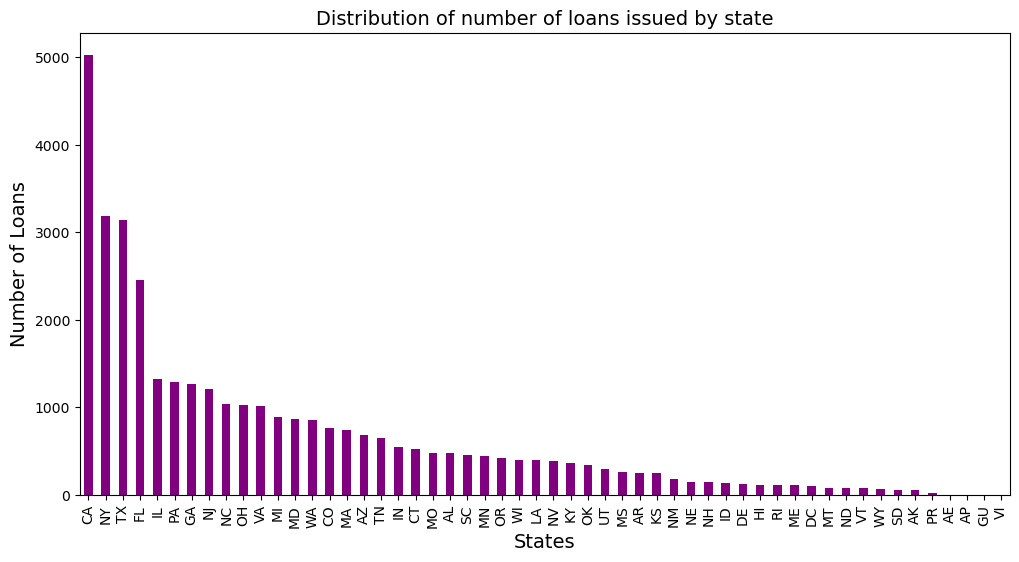

In [9]:
number_of_loans_by_states= loan_tape['state_issued'].value_counts()
number_of_loans_by_states.sort_values(ascending=False,inplace=True)
ax=number_of_loans_by_states.plot(kind='bar',figsize=(12, 6),color='purple')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of number of loans issued by state',fontsize=14)
plt.xlabel('States',fontsize=14)
plt.ylabel('Number of Loans',fontsize=14)
plt.show()

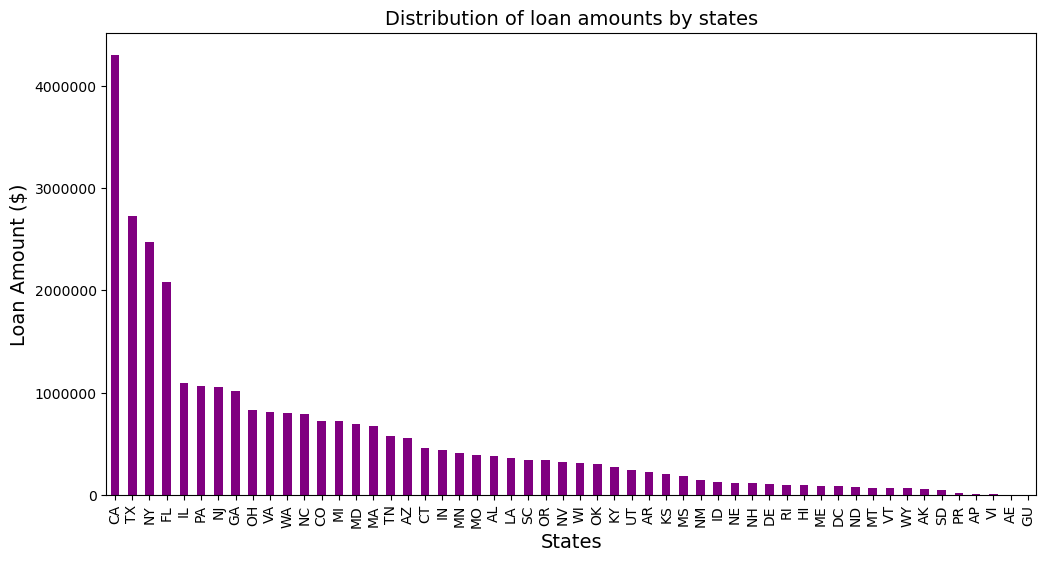

In [10]:
loan_amounts_by_states= loan_tape.groupby('state_issued')['loan_amount'].sum()
loan_amounts_by_states.sort_values(ascending=False,inplace=True)
ax=loan_amounts_by_states.plot(kind='bar',figsize=(12, 6),color='purple')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of loan amounts by states',fontsize=14)
plt.xlabel('States',fontsize=14)
plt.ylabel('Loan Amount ($)',fontsize=14)
plt.show()

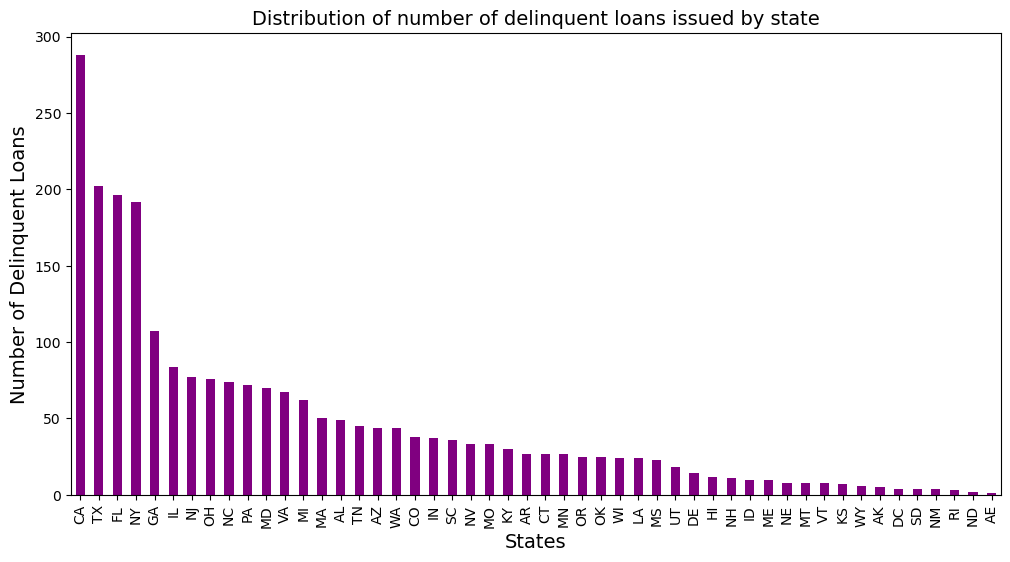

In [11]:
number_of_delinquent_loans_by_states= delinquent_loan_tape['state_issued'].value_counts()
number_of_delinquent_loans_by_states.sort_values(ascending=False,inplace=True)
ax=number_of_delinquent_loans_by_states.plot(kind='bar',figsize=(12, 6),color='purple')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of number of delinquent loans issued by state',fontsize=14)
plt.xlabel('States',fontsize=14)
plt.ylabel('Number of Delinquent Loans',fontsize=14)
plt.show()

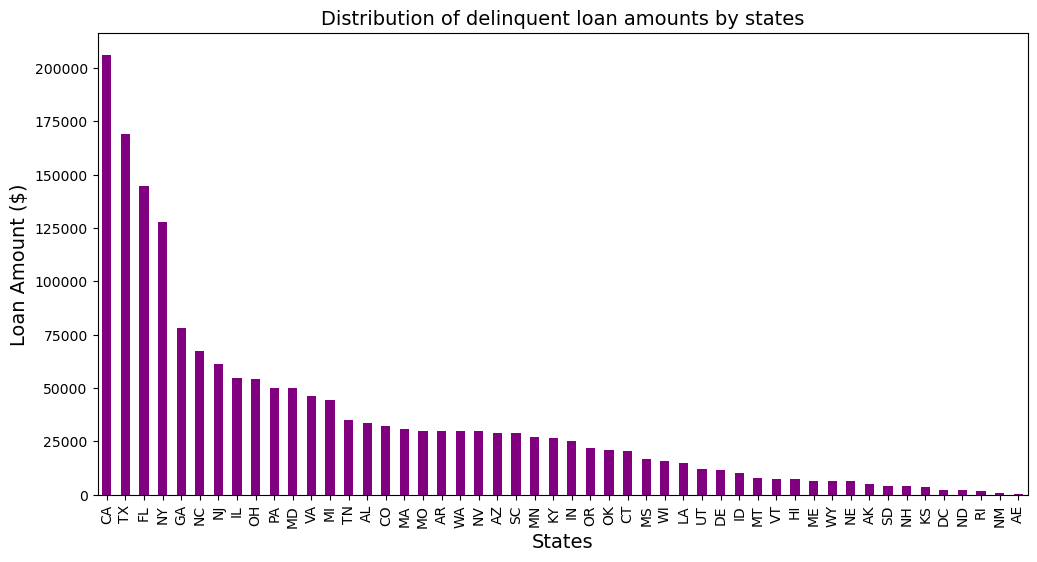

In [12]:
delinquent_loan_amounts_by_states= delinquent_loan_tape.groupby('state_issued')['loan_amount'].sum()
delinquent_loan_amounts_by_states.sort_values(ascending=False,inplace=True)
ax=delinquent_loan_amounts_by_states.plot(kind='bar',figsize=(12, 6),color='purple')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of delinquent loan amounts by states',fontsize=14)
plt.xlabel('States',fontsize=14)
plt.ylabel('Loan Amount ($)',fontsize=14)
plt.show()

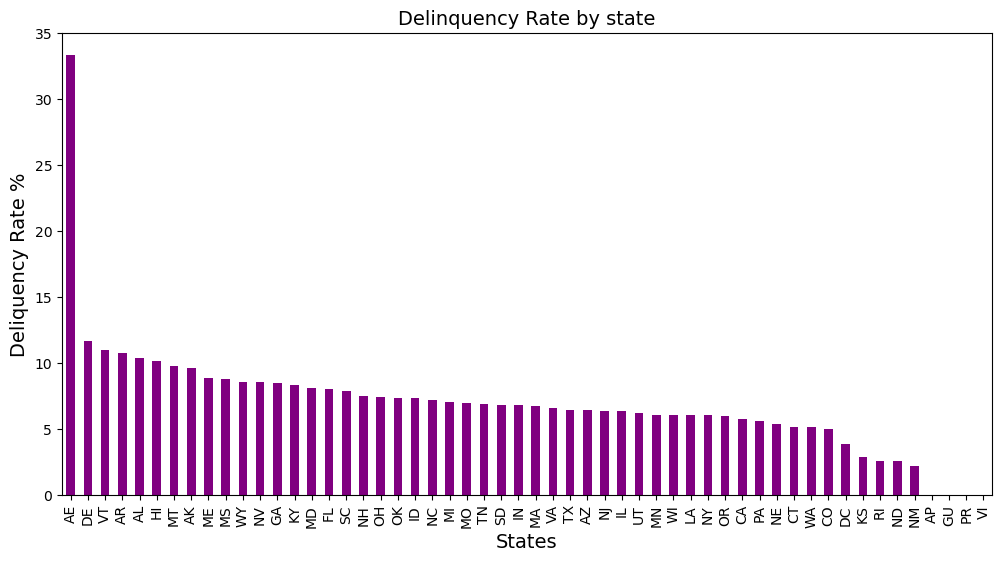

In [13]:
delinquency_rate_by_state= number_of_delinquent_loans_by_states/number_of_loans_by_states*100
delinquency_rate_by_state.sort_values(ascending=False,inplace=True)
ax=delinquency_rate_by_state.plot(kind='bar',figsize=(12, 6),color='purple')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Delinquency Rate by state',fontsize=14)
plt.xlabel('States',fontsize=14)
plt.ylabel('Deliquency Rate %',fontsize=14)
plt.show()

### Risk Mitigation Strategy: 
#### The states of AL, DE, VT, AR, and HI have a delinquency rate of > 10%. All other states are below that threshold. AL and AR have a significant loan amount disbursed (as seen from the chart before) and need targeted recovery strategies.

### Determining the distribution of delinquent loans by merchant industry:

In [14]:
number_of_delinquent_loans_by_merchant_industry = (delinquent_loan_tape['merchant_industry']).value_counts()
top_merchant_industries_delinquent_loans= number_of_delinquent_loans_by_merchant_industry.nlargest(5)
print(f"{round(top_merchant_industries_delinquent_loans.sum()/total_number_of_delinquent_loans*100,2)}% of the total number of deliquent loans are in the merchant industries of Furniture / Homewares, Apparel, Aftermarket Auto, Other, and Consumer Electronics.")
top_merchant_industries_total_delinquent_loan_amounts = delinquent_loan_tape.loc[delinquent_loan_tape['merchant_industry'].isin(['Furniture / Homewares','Apparel','Aftermarket Auto','Other','Consumer Electronics']), 'loan_amount'].sum()
print(f"{round(top_merchant_industries_total_delinquent_loan_amounts.sum()/total_amount_of_delinquent_loans*100,2)}% of the total amount of deliquent loans are in the merchant industries of Furniture / Homewares, Apparel, Aftermarket Auto, Other, and Consumer Electronics.")
top_merchant_industries_total_loans = loan_tape.loc[loan_tape['merchant_industry'].isin(['Furniture / Homewares','Apparel','Aftermarket Auto','Other','Cosnumer Electronics']), 'loan_amount'].sum()
print(f"{round(top_merchant_industries_total_loans/total_loan_amount*100,2)}% of the total amount of loans in the portfolio were orginated in the merchant industries of Furniture / Homewares, Apparel, Aftermarket Auto, Other, and Consumer Electronics.")

75.71% of the total number of deliquent loans are in the merchant industries of Furniture / Homewares, Apparel, Aftermarket Auto, Other, and Consumer Electronics.
71.33% of the total amount of deliquent loans are in the merchant industries of Furniture / Homewares, Apparel, Aftermarket Auto, Other, and Consumer Electronics.
51.99% of the total amount of loans in the portfolio were orginated in the merchant industries of Furniture / Homewares, Apparel, Aftermarket Auto, Other, and Consumer Electronics.


#### With about half of the loans originated and about 3/4th of the total number of deliquent loans present in specific merchant industries, there is a industry-specific risk evident in the portfolio.

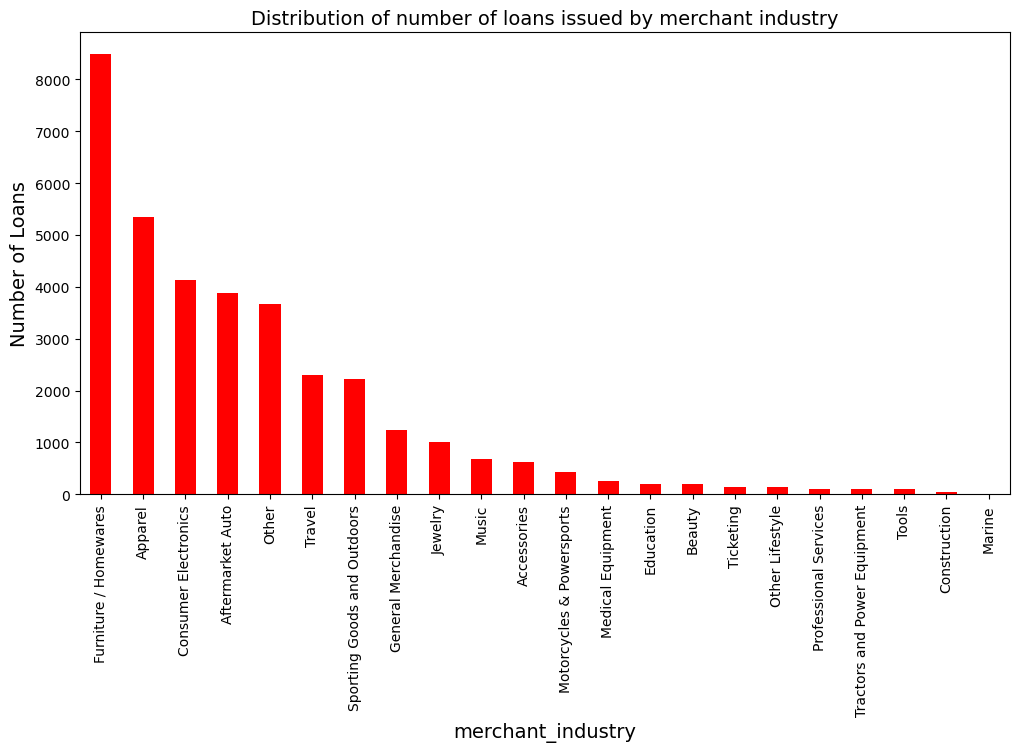

In [15]:
number_of_loans_by_merchant_industry= loan_tape['merchant_industry'].value_counts()
number_of_loans_by_merchant_industry.sort_values(ascending=False,inplace=True)
ax=number_of_loans_by_merchant_industry.plot(kind='bar',figsize=(12, 6),color='red')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of number of loans issued by merchant industry',fontsize=14)
plt.xlabel('merchant_industry',fontsize=14)
plt.ylabel('Number of Loans',fontsize=14)
plt.show()

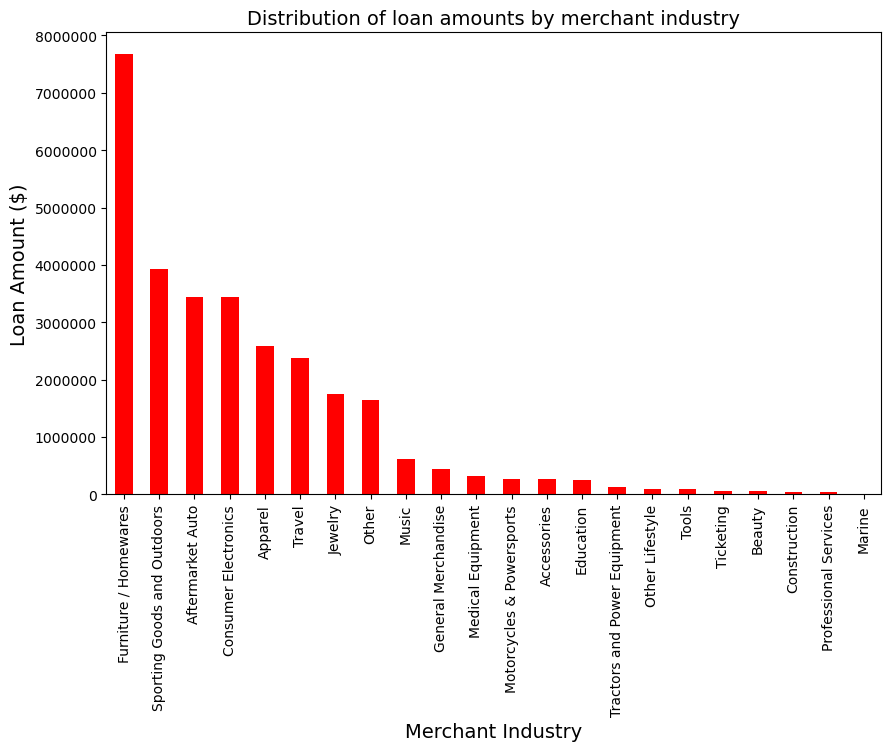

In [16]:
loan_amounts_by_merchant_industry= loan_tape.groupby('merchant_industry')['loan_amount'].sum()
loan_amounts_by_merchant_industry.sort_values(ascending=False,inplace=True)
ax=loan_amounts_by_merchant_industry.plot(kind='bar',figsize=(10, 6),color='red')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of loan amounts by merchant industry',fontsize=14)
plt.xlabel('Merchant Industry',fontsize=14)
plt.ylabel('Loan Amount ($)',fontsize=14)
plt.show()

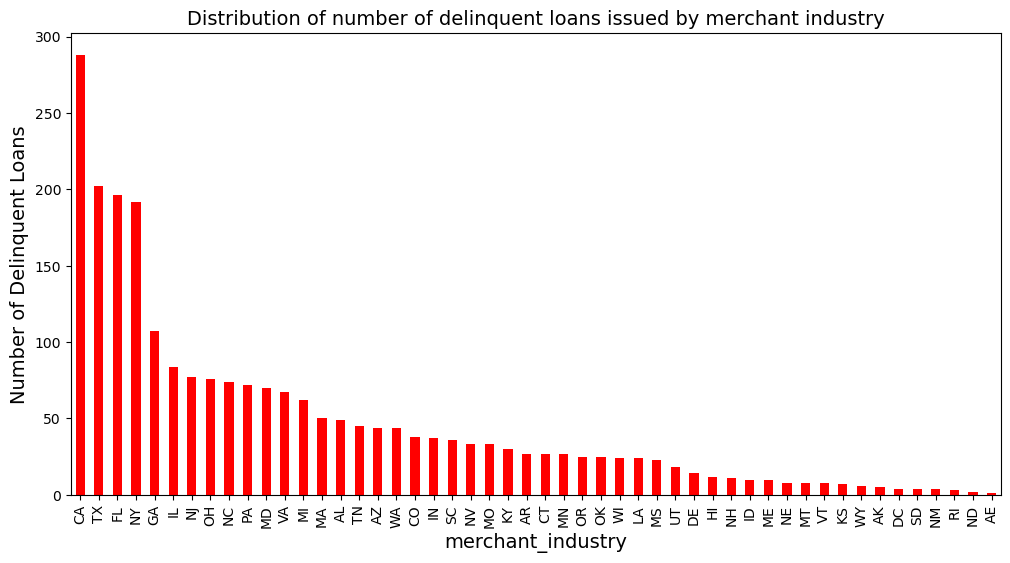

In [17]:
number_of_delinquent_loans_by_merchant_industry= delinquent_loan_tape['merchant_industry'].value_counts()
number_of_delinquent_loans_by_merchant_industry.sort_values(ascending=False,inplace=True)
ax=number_of_delinquent_loans_by_states.plot(kind='bar',figsize=(12, 6),color='red')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of number of delinquent loans issued by merchant industry',fontsize=14)
plt.xlabel('merchant_industry',fontsize=14)
plt.ylabel('Number of Delinquent Loans',fontsize=14)
plt.show()

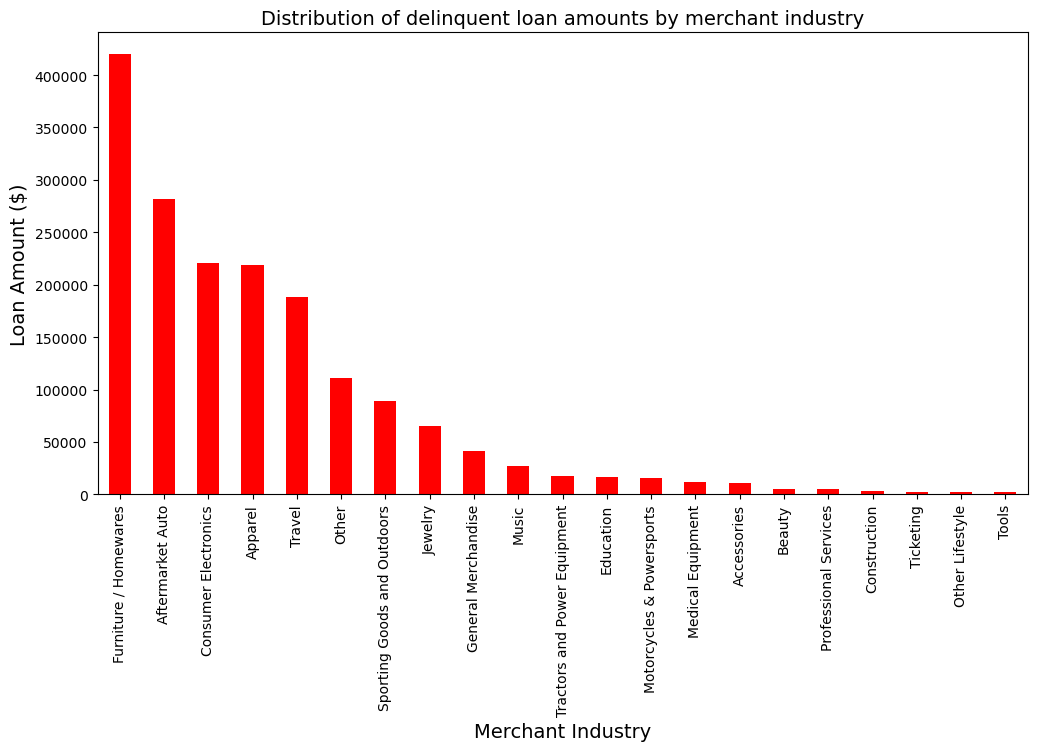

In [18]:
delinquent_loan_amounts_by_merchant_industries= delinquent_loan_tape.groupby('merchant_industry')['loan_amount'].sum()
delinquent_loan_amounts_by_merchant_industries.sort_values(ascending=False,inplace=True)
ax=delinquent_loan_amounts_by_merchant_industries.plot(kind='bar',figsize=(12, 6),color='red')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Distribution of delinquent loan amounts by merchant industry',fontsize=14)
plt.xlabel('Merchant Industry',fontsize=14)
plt.ylabel('Loan Amount ($)',fontsize=14)
plt.show()

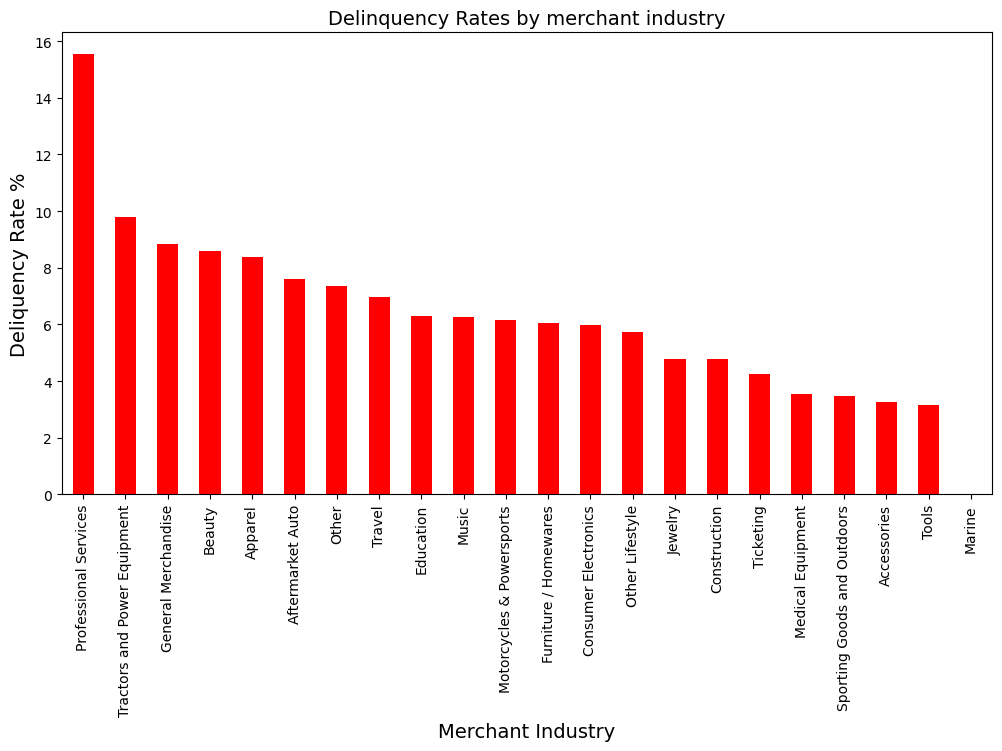

In [19]:
delinquency_rate_by_merchant_industry= number_of_delinquent_loans_by_merchant_industry/number_of_loans_by_merchant_industry*100
delinquency_rate_by_merchant_industry.sort_values(ascending=False,inplace=True)
ax=delinquency_rate_by_merchant_industry.plot(kind='bar',figsize=(12, 6),color='red')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
plt.title('Delinquency Rates by merchant industry',fontsize=14)
plt.xlabel('Merchant Industry',fontsize=14)
plt.ylabel('Deliquency Rate %',fontsize=14)
plt.show()

### Risk Mitigation Strategy: 
#### The loans to consumers with purposes in the Professional Services, Tractors and Power Equipment Industry, General Merchandise, Beauty, and Apparel is relatively higher delinquency rate. This effects in a smaller loan amount exposure to these categories (as seen in the graph before). Apparel and General Merchandise have a significant loan amount disbursed (as seen from the chart before) and need targeted recovery strategies.

#### Loans for stable and essential purposes (e.g., furniture and hardware) are less likely to be defaulted on than loans for speculative investments. In the context of essential consumer goods, it is noteworthy to observe elevated delinquency rates within loans associated with the apparel segment, an anomaly warranting further analysis and strategic oversight

# Interest Rates

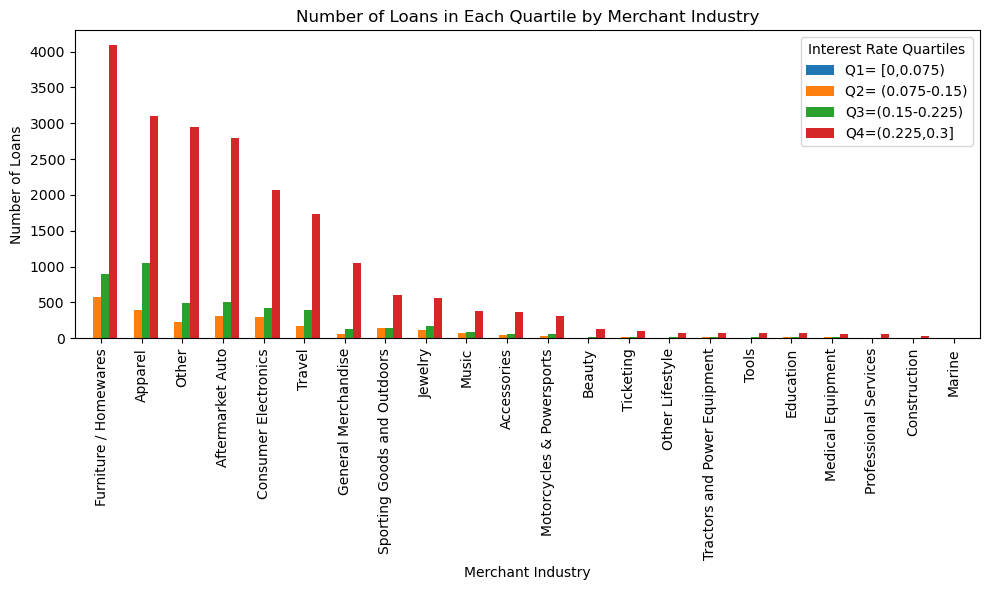

In [20]:
edges = [0, 0.075, 0.15, 0.225, 0.3]
loan_tape['Quartiles']= loan_tape.groupby('merchant_industry')['interest_rate'].transform(lambda x: pd.cut(x,bins=edges,labels=['Q1= [0,0.075)', 'Q2= (0.075-0.15)', 'Q3=(0.15-0.225)', 'Q4=(0.225,0.3]']))
industry_loans_quartile_counts = loan_tape.groupby(['merchant_industry', 'Quartiles']).size().unstack(fill_value=0)
sorted_quartile_counts = industry_loans_quartile_counts.sort_values(by='Q4=(0.225,0.3]', ascending=False)
sorted_quartile_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Number of Loans in Each Quartile by Merchant Industry')
plt.ylabel('Number of Loans')
plt.xlabel('Merchant Industry')
plt.legend(title='Interest Rate Quartiles')
plt.tight_layout()

plt.show()

#### Based on the preceding charts, the majority of loans were generated in the merchant industries of Furniture/Homewares, Apparel, Other, Aftermarket Auto, Consumer Electronics, and the Travel industry. Among these sectors, a significant portion of the loans had interest rates in the highest quartile, ranging between 0.225% and 0.3%.

# Loan Grades

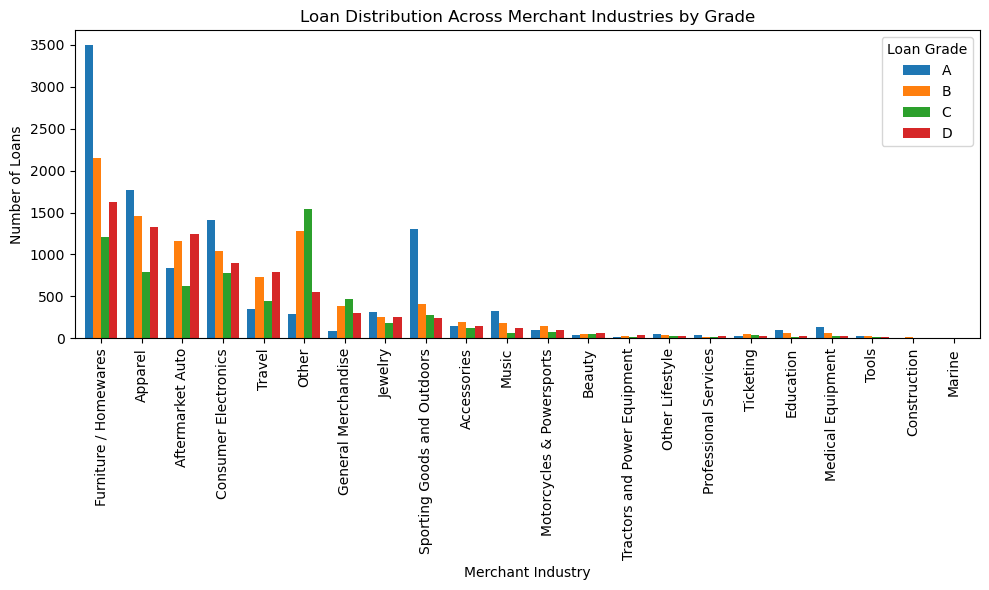

In [21]:
loan_tape['Counter'] = 1
grade_pivot = loan_tape.pivot_table(index='merchant_industry', columns='loan_grade', values='Counter', aggfunc=np.sum)
grade_sorted_pivot= grade_pivot.sort_values(by='D', ascending=False)
grade_sorted_pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Loan Distribution Across Merchant Industries by Grade')
plt.ylabel('Number of Loans')
plt.xlabel('Merchant Industry')
plt.legend(title='Loan Grade')
plt.tight_layout()

plt.show()

#### The 'D' grade loans are most inssued in the Furniture/Homewares, Apparel, Aftermarket Auto, Consumer Electronics, and the Travel merchant industries.

# FICO Scores

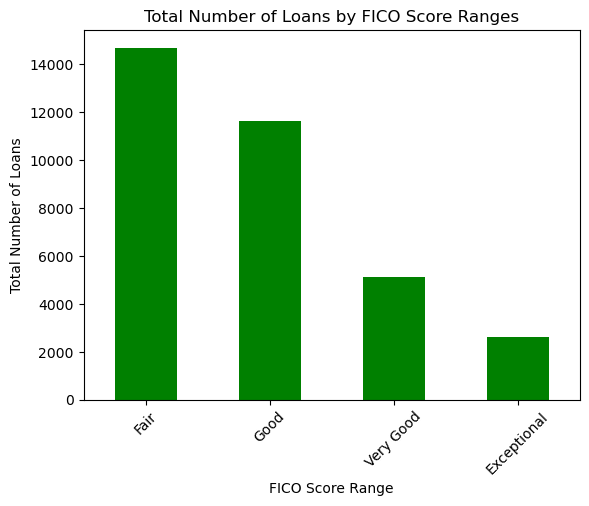

In [34]:
bins = [600, 650, 700, 750, 800]
labels = ['Fair', 'Good', 'Very Good', 'Exceptional']

loan_tape['Credit_Score_Range'] = pd.cut(loan_tape['fico_score'], bins=bins, labels=labels, right=False)
number_of_loans_by_fico_score = loan_tape.groupby('Credit_Score_Range')['Counter'].sum()

number_of_loans_by_fico_score.plot(kind='bar',color='green')
plt.title('Total Number of Loans by FICO Score Ranges')
plt.xlabel('FICO Score Range')
plt.ylabel('Total Number of Loans')
plt.xticks(rotation=45)
plt.show()

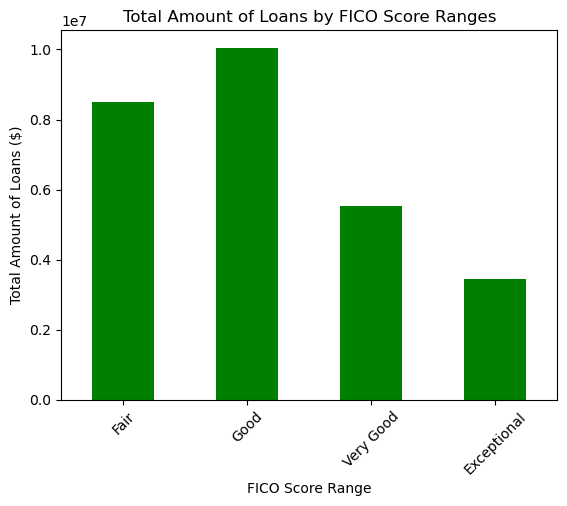

In [36]:
loan_amounts_by_fico_score= loan_tape.groupby('Credit_Score_Range')['loan_amount'].sum()
loan_amounts_by_fico_score.plot(kind='bar',color='green')
plt.title('Total Amount of Loans by FICO Score Ranges')
plt.xlabel('FICO Score Range')
plt.ylabel('Total Amount of Loans ($)')
plt.xticks(rotation=45)
plt.show()